In [1]:
#Загружаем наш дата сет. Мы имеем дата сет из 11 колонок (fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, alcohol, quality) и 1599 строк. Крайний столбец quality выступает как классификатор.

In [2]:
# Загружаем необходимые библиотеки для начала работы (Numpy, Matplotlib.pyplot ,Pandas)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Загружаем дата сет в формате сsv, разделитель запятые.
df = pd.read_csv('vino2.csv', sep=',' )

In [4]:
# Проверяем как загрузился дата сет. 
df

,fixedacidity,volatileacidity,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [5]:
# Делим наш дата сет на обучающую и тестирующую выборку в пропорции 20/80.
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [6]:
# Производим шкалирование наших данных без нашей эдогенной переменной quality.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
# Строим базовую модель и смотрим на полученный отчет. Можно сделать вывод, что значимых перменных только четыре, но мы будем использовать только две, чтобы можно было продемонстрировать на графике, это volatile acidity и total sulfur dioxide. Будем использовать их для построения наших классификаторов.
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.519679
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.247     
Dependent Variable: y                AIC:              1349.3398 
Date:               2020-12-19 11:07 BIC:              1400.8782 
No. Observations:   1279             Log-Likelihood:   -664.67   
Df Model:           9                LL-Null:          -882.54   
Df Residuals:       1269             LLR p-value:      3.1908e-88
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        -0.0598     0.1065   -0.5612   0.5746   -0.2685    0.1490
x2        -0.5237     0.0797   -6.5726   0.0000   -0.6798 

In [8]:
# Остлавляем только значимые переменные.
X_train = X_train[:,[1,5]]
X_test = X_test[:,[1,5]]

In [9]:
# Обучаем модель логистической регрессии.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [10]:
# Делаем прогноз на тестовой выборке. Уровень качества модели ниже нормального (80%), только 66%, то есть 66% объектов будут распознаны правильно.
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.66875

In [11]:
# Строим таблицу сопряженности. Можно сделать вывод, что 38 положительных случая ложно определены как отрицательные и 68 отрицательных случаев определены моделью как положительные. 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 87  68]
 [ 38 127]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


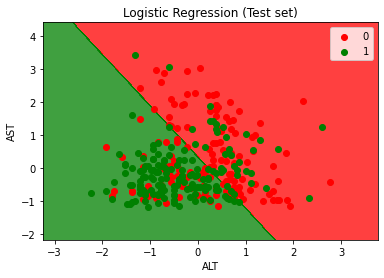

In [12]:
# Строим область значений. Они отделяются линейно. Зелёные точки - вино высокого качества, красные точки - вино низкого качества.  
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.legend()
plt.show()

In [13]:
# Устанавливаем необходимые пакеты Keras.
import keras
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# Строим нейронную сеть прямой передачи сигнала. На входном слое 8 нейрона (усложнее). Используем функцию relu, которая позволит учесть наличие линейнносоти в исходных данных. На втором слое выбирем 1 нейрон используя сигмоидальную функцию. 
cnn = Sequential()
cnn.add(Dense(units = 8,  activation = 'relu', input_dim = 2))
cnn.add(Dense(units = 1,  activation = 'sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
# Обучаем нейронную сеть в течении 100 эпох.
cnn.fit(X_train, y_train, epochs = 100, batch_size = 8)

Epoch 1/100
160/160 [==============================] - 0s 536us/step - loss: 0.7995 - accuracy: 0.5418
Epoch 2/100
160/160 [==============================] - 0s 505us/step - loss: 0.6848 - accuracy: 0.5575
Epoch 3/100
160/160 [==============================] - 0s 507us/step - loss: 0.6372 - accuracy: 0.6200
Epoch 4/100
160/160 [==============================] - 0s 428us/step - loss: 0.6187 - accuracy: 0.6661
Epoch 5/100
160/160 [==============================] - 0s 435us/step - loss: 0.6118 - accuracy: 0.6701
Epoch 6/100
160/160 [==============================] - 0s 433us/step - loss: 0.6086 - accuracy: 0.6685
Epoch 7/100
160/160 [==============================] - 0s 464us/step - loss: 0.6072 - accuracy: 0.6685
Epoch 8/100
160/160 [==============================] - 0s 429us/step - loss: 0.6063 - accuracy: 0.6708
Epoch 9/100
160/160 [==============================] - 0s 437us/step - loss: 0.6057 - accuracy: 0.6693
Epoch 10/100
160/160 [==============================] - 0s 426us/step - l

160/160 [==============================] - 0s 430us/step - loss: 0.5994 - accuracy: 0.6747
Epoch 80/100
160/160 [==============================] - 0s 429us/step - loss: 0.5995 - accuracy: 0.6701
Epoch 81/100
160/160 [==============================] - 0s 429us/step - loss: 0.5994 - accuracy: 0.6732
Epoch 82/100
160/160 [==============================] - 0s 417us/step - loss: 0.5994 - accuracy: 0.6724
Epoch 83/100
160/160 [==============================] - 0s 418us/step - loss: 0.5992 - accuracy: 0.6716
Epoch 84/100
160/160 [==============================] - 0s 411us/step - loss: 0.5995 - accuracy: 0.6716
Epoch 85/100
160/160 [==============================] - 0s 426us/step - loss: 0.5995 - accuracy: 0.6724
Epoch 86/100
160/160 [==============================] - 0s 424us/step - loss: 0.5993 - accuracy: 0.6732
Epoch 87/100
160/160 [==============================] - 0s 415us/step - loss: 0.5993 - accuracy: 0.6708
Epoch 88/100
160/160 [==============================] - 0s 445us/step - loss:

In [16]:
# Строим прогноз на тестовой выборке.
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [17]:
# Строим таблицу сопряженности. Можно сделать вывод, что 46 положительных случая ложно определены как отрицательные и 58 отрицательный случай ложно определен как положительный.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 97  58]
 [ 46 119]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


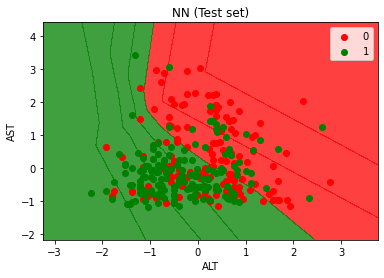

In [18]:
# Строим область значений. Они отделяются не линейно.  
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('ALT')
plt.ylabel('AST')
plt.legend()
plt.show()

In [19]:
# Выводы. Подводя итоги можно сказать, что исходная логистическая модель обладает пониженной точностью и качественностью и определяет 66% объектов верно. Так же стоит отметить, что позитивные и негативные значения отдлеяются линейно в случае логичстичекой регрессии и не линейно при построении нейронной сети. Эту линейность мы используем для построения нейронной сети. При использовании стандартных параметров мы получаем качество модели худше, но при этом сохраняется линейность отделения позитивных от негативных. Для улучшения качества модели было принято решение увеличить количество нейронов на первом слое с 2 до 8, что позволило немного улучшить качество модели в целом, однако разделение положительных от отрицательных более не линейно. 